# WILDFIRE-URBAN INTERFACE

## HELPFUL LINKS: ##
    - https://medium.com/ibm-data-ai/predicting-australian-wildfires-with-weather-forecast-data-8d1cc983c863
    - https://github.com/Call-for-Code/Spot-Challenge-Wildfires
    - https://h2o.ai/wildfire/
    - https://github.com/prodramp/wildfire/blob/main/dataset/README.md
    - https://github.com/h2oai/challenge-wildfires/blob/main/notebook/DataPreparation.ipynb
    - https://github.com/mapbox/mapboxgl-jupyter
    - https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

![modpas-nasa](https://github.com/prodramp/wildfire/blob/main/images/modaps-nasa.png?raw=true)

## Data Collection ##
- Used NASA FIRMS Data


<div style="max-width:400px;">
    <img src="https://github.com/prodramp/wildfire/blob/main/images/disclaimer.png?raw=true" size="400px"/>
</div>

In [16]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import plotly.express as px
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
total_csv = glob.glob('../../../../../../../../WILDFIRE/**/*.csv', recursive=True)

In [18]:
total_csv

['../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Afghanistan.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Albania.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Algeria.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Angola.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Argentina.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Armenia.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Australia.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Austria.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Azerbaijan.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_Bahamas.csv',
 '../../..

In [19]:
Only_USA= list(filter(lambda k: 'United_States' in k, total_csv))

In [20]:
Only_USA

['../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2001\\modis_2001_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2001\\modis_2001_United_States_Minor_Outlying_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2001\\modis_2001_United_States_Virgin_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2002\\modis_2002_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2002\\modis_2002_United_States_Minor_Outlying_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2002\\modis_2002_United_States_Virgin_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2003\\modis_2003_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2003\\modis_2003_United_S

In [21]:
Only_USA

['../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2000\\modis_2000_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2001\\modis_2001_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2001\\modis_2001_United_States_Minor_Outlying_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2001\\modis_2001_United_States_Virgin_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2002\\modis_2002_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2002\\modis_2002_United_States_Minor_Outlying_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2002\\modis_2002_United_States_Virgin_Islands.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2003\\modis_2003_United_States.csv',
 '../../../../../../../../WILDFIRE\\DATASET WILDFIRE VIIRS\\modis\\2003\\modis_2003_United_S

In [22]:
#df_V stands for VIIRS instrument
df_V = pd.read_csv('../../../../../../../../WILDFIRE/DATASET WILDFIRE VIIRS/viirs-snpp/2020/viirs-snpp_2020_United_States.csv', low_memory=False)

In [23]:
df_V

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,46.730213,-92.075386,303.31,0.56,0.52,2020-01-01,727,N,VIIRS,n,1,264.04,1.43,N,3
1,46.729069,-92.077477,301.76,0.56,0.52,2020-01-01,727,N,VIIRS,n,1,263.05,1.27,N,2
2,40.721516,-84.126244,323.46,0.39,0.36,2020-01-01,728,N,VIIRS,n,1,268.47,1.80,N,2
3,41.639717,-87.130882,300.05,0.45,0.39,2020-01-01,728,N,VIIRS,n,1,268.17,1.23,N,3
4,41.619049,-87.328514,297.25,0.46,0.39,2020-01-01,728,N,VIIRS,n,1,268.34,0.82,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672445,19.409372,-155.295761,332.17,0.49,0.49,2020-12-31,2306,N,VIIRS,n,1,290.31,3.08,1,0
672446,19.402180,-155.285187,367.00,0.49,0.49,2020-12-31,2306,N,VIIRS,l,1,286.75,26.13,1,0
672447,19.404821,-155.271347,350.90,0.49,0.49,2020-12-31,2306,N,VIIRS,n,1,288.63,67.31,1,0
672448,19.399593,-155.298752,326.91,0.49,0.49,2020-12-31,2306,N,VIIRS,n,1,285.83,4.16,1,0


In [24]:
df_V['satellite'].unique()
df_V['instrument'].unique()
type(df_V.confidence[0])

array(['N'], dtype=object)

array(['VIIRS'], dtype=object)

str

In [25]:
df_V.confidence.unique()

array(['n', 'h', 'l'], dtype=object)

In [26]:
#df_M stands for MODIS instrument
df_M = pd.read_csv('../../../../../../../../WILDFIRE/DATASET WILDFIRE VIIRS/modis/2020/modis_2020_United_States.csv')

In [27]:
df_M

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,31.8349,-83.0561,306.7,1.4,1.2,2020-01-01,324,Terra,MODIS,69,6.03,277.6,18.9,N,0
1,36.3562,-76.8050,300.2,1.2,1.1,2020-01-01,325,Terra,MODIS,20,6.03,278.9,10.2,N,0
2,33.4178,-110.8616,321.5,1.0,1.0,2020-01-01,920,Aqua,MODIS,100,6.03,271.8,24.9,N,2
3,41.4810,-90.8294,310.0,1.0,1.0,2020-01-01,1704,Terra,MODIS,69,6.03,276.5,13.8,D,0
4,38.6973,-90.1281,311.7,1.1,1.0,2020-01-01,1705,Terra,MODIS,54,6.03,282.3,14.1,D,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153843,38.7099,-122.8631,316.1,1.1,1.1,2020-12-31,2131,Aqua,MODIS,76,6.03,285.8,18.6,D,0
153844,39.7121,-122.2936,300.4,1.2,1.1,2020-12-31,2131,Aqua,MODIS,35,6.03,286.2,5.6,D,0
153845,37.7988,-121.1489,301.3,1.3,1.1,2020-12-31,2131,Aqua,MODIS,46,6.03,281.4,8.6,D,0
153846,39.1593,-122.9303,308.7,1.1,1.1,2020-12-31,2131,Aqua,MODIS,67,6.03,283.3,13.1,D,0


In [28]:
df_M['satellite'].unique()
df_M['instrument'].unique()

array(['Terra', 'Aqua'], dtype=object)

array(['MODIS'], dtype=object)

In [29]:
df_M['confidence'].unique()

array([ 69,  20, 100,  54,  38,  60,   0,  70,  78,  46,  57,  83,  82,
        74,  79,  86,  53,  72,  41,  35,  73,  66,  84,  59,  55,  31,
        45,  50,  51,  47,  71,  63,  24,  36,  48,  80,  62,  49,  65,
        75,  67,  52,  58,  56,  93,  94,  64,  68,  61,  85,  90,  81,
        40,  88,  42,  97,  96,  33,  91,  87,  77,  76,  39,  44,  95,
        37,  89,  98,  30,  99,  21,  92,  29,  16,  17,  26,  32,  34,
        43,  25,  22,  19,  28,   9,  27,  23,  15,  13,  14,  18,  11,
        10,   8,  12,   6,   4,   7,   3,   5,   2,   1], dtype=int64)

In [30]:
# Referred H2O.ai wild fire competition github repo
rows = []
fire_df = []
row_sum = 0
for f in tqdm(Only_USA):
    df = pd.read_csv(f, parse_dates=['acq_time'], low_memory=False) 
    csv_name = f.split('/')[-1]
    row = [
        f, csv_name, df.shape[0], df.shape[1], df.acq_date.min(), df.acq_date.max(),
        df.satellite.unique(), df.instrument.max(), df.version.max(),
        df.latitude.nunique(), df.longitude.nunique(),
        df.confidence.nunique(), df.satellite.nunique(), df.acq_date.nunique()
    ]
    if isinstance(df.confidence[0], str):
        df.confidence = df.confidence.replace({'l': 0, 'n': 50, 'h': 100})
    rows.append(row)
    row_sum = row_sum + df.shape[0]
    fire_df.append(df)
cols = [
    'path', 'csv', 'rows', 'cols', 'start', 'end',
    'satellite', 'instrument', 'version',
    'lats', 'lons', 'confs', 'sats', 'days'
]
filestats = pd.DataFrame(rows, columns=cols)
filestats.sort_values(by=['start', 'instrument'])
print("Total Rows: " + str(row_sum))

100%|██████████████████████████████████████████████████████████████████████████████████| 81/81 [00:17<00:00,  4.57it/s]


,path,csv,rows,cols,start,end,satellite,instrument,version,lats,lons,confs,sats,days
0,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2000\mod...,3781,15,2000-11-01,2000-12-31,[Terra],MODIS,6.20,3720,3712,96,1,61
1,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2001\mod...,44941,15,2001-01-01,2001-12-31,[Terra],MODIS,6.20,37881,40596,101,1,347
3,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2001\mod...,3,15,2001-08-03,2001-09-27,[Terra],MODIS,6.20,3,3,3,1,2
2,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2001\mod...,1,15,2001-12-03,2001-12-03,[Terra],MODIS,6.20,1,1,1,1,1
4,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2002\mod...,79715,15,2002-01-01,2002-12-31,"[Terra, Aqua]",MODIS,6.20,61851,68094,101,2,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\viirs-snpp\202...,661058,15,2021-01-01,2021-12-31,[N],VIIRS,1.00,584054,510255,3,1,364
80,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\viirs-snpp\202...,40,15,2021-01-10,2021-05-09,[N],VIIRS,1.00,39,39,1,1,29
58,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2021\mod...,12,15,2021-03-07,2021-12-31,"[Aqua, Terra]",MODIS,6.03,10,12,11,2,11
59,../../../../../../../../WILDFIRE\DATASET WILDF...,WILDFIRE\DATASET WILDFIRE VIIRS\modis\2021\mod...,2,15,2021-09-30,2021-10-20,"[Aqua, Terra]",MODIS,6.03,2,2,1,2,2


Total Rows: 7844622


In [31]:
fire_df

[      latitude  longitude  brightness  scan  track    acq_date acq_time  \
 0      38.5422   -78.3047       304.8   2.8    1.6  2000-11-01     0250   
 1      38.5563   -78.3084       309.4   2.8    1.6  2000-11-01     0250   
 2      38.5451   -78.3107       309.9   2.8    1.6  2000-11-01     0250   
 3      38.5586   -78.3170       302.3   2.8    1.6  2000-11-01     0250   
 4      31.3393   -89.9124       304.9   1.0    1.0  2000-11-01     0427   
 ...        ...        ...         ...   ...    ...         ...      ...   
 3776   26.6922   -80.8788       301.0   2.8    1.6  2000-12-31     1656   
 3777   26.7034   -80.8811       300.1   2.8    1.6  2000-12-31     1656   
 3778   26.6977   -80.8537       304.6   2.8    1.6  2000-12-31     1656   
 3779   38.3211  -108.8656       300.0   1.1    1.0  2000-12-31     1832   
 3780   19.3377  -155.0456       312.2   4.1    1.9  2000-12-31     2155   
 
      satellite instrument  confidence  version  bright_t31   frp daynight  \
 0      

In [32]:
totalFire_df = pd.concat(fire_df)
totalFire_df.shape

(7844622, 17)

In [33]:
totalFire_df.sample(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,bright_ti4,bright_ti5
547664,41.664070,-123.370331,NaN,0.54,0.42,2021-09-17,1030,N,VIIRS,50,1.0,NaN,4.60,N,0,302.33,288.79
337516,34.294254,-110.915695,NaN,0.51,0.41,2016-09-19,0854,N,VIIRS,50,1.0,NaN,4.51,N,0,333.36,289.89
174108,47.622547,-120.321953,NaN,0.57,0.69,2014-07-09,1940,N,VIIRS,50,1.0,NaN,18.44,D,0,335.30,300.56
304611,19.479826,-154.827301,NaN,0.67,0.74,2018-08-01,1251,N,VIIRS,100,1.0,NaN,52.98,N,3,367.00,291.32
176820,36.175419,-120.520996,NaN,0.32,0.55,2020-07-17,2018,N,VIIRS,100,1.0,NaN,46.77,1,0,367.00,312.58
15677,32.179924,-103.172989,NaN,0.43,0.46,2016-02-02,0908,N,VIIRS,50,1.0,NaN,4.96,N,2,328.98,278.30
294280,43.303757,-122.635475,NaN,0.48,0.48,2017-08-15,1044,N,VIIRS,50,1.0,NaN,0.92,N,0,295.40,282.33
371328,30.449608,-91.454422,NaN,0.75,0.77,2016-10-17,1806,N,VIIRS,50,1.0,NaN,5.02,D,0,330.76,291.77
540575,41.077862,-123.239738,NaN,0.39,0.36,2021-09-14,2112,N,VIIRS,50,1.0,NaN,38.90,D,0,350.97,309.91
101746,36.089352,-99.065552,NaN,0.48,0.48,2018-04-13,2006,N,VIIRS,50,1.0,NaN,37.12,D,0,353.99,309.86


In [34]:
totalFire_df = totalFire_df.sort_values(by=['acq_date', 'acq_time'])

In [35]:
totalFire_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,bright_ti4,bright_ti5
0,38.542200,-78.304700,304.8,2.80,1.60,2000-11-01,0250,Terra,MODIS,23,6.20,280.9,40.30,N,0,NaN,NaN
1,38.556300,-78.308400,309.4,2.80,1.60,2000-11-01,0250,Terra,MODIS,70,6.20,280.4,54.50,N,0,NaN,NaN
2,38.545100,-78.310700,309.9,2.80,1.60,2000-11-01,0250,Terra,MODIS,79,6.20,280.7,58.80,N,0,NaN,NaN
3,38.558600,-78.317000,302.3,2.80,1.60,2000-11-01,0250,Terra,MODIS,45,6.20,279.8,36.00,N,0,NaN,NaN
4,31.339300,-89.912400,304.9,1.00,1.00,2000-11-01,0427,Terra,MODIS,62,6.20,287.5,8.50,N,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163684,30.311900,-91.865100,310.4,1.00,1.00,2021-12-31,1920,Aqua,MODIS,58,6.03,293.3,6.80,D,0,NaN,NaN
163685,30.978700,-92.095400,313.2,1.00,1.00,2021-12-31,1920,Aqua,MODIS,69,6.03,294.6,8.60,D,0,NaN,NaN
163686,30.463200,-92.197300,314.8,1.00,1.00,2021-12-31,1920,Aqua,MODIS,71,6.03,294.8,10.80,D,0,NaN,NaN
661056,38.554855,-122.550667,NaN,0.52,0.41,2021-12-31,2042,N,VIIRS,50,1.00,NaN,8.67,D,0,334.54,281.30


In [36]:
totalFire_df['confidence'].unique() #changed VIIRS confidence to integer

array([ 23,  70,  79,  45,  62,  75,  74,  54,  69,  77,  72,  49,  36,
        43,  52,  21,  63,  57,  68,  67,   0,  56,  96,  98, 100,  95,
        42,  73,  91,  92,  41,  26,  53,  88,  81,  51,  61,  59,  60,
        76,  71,  46,  47,  82,  50,  65,  83,  55,  22,  58,  97,  90,
        87,  86,  66,  34,  84,  78,  44,  80,  89,  29,  85,  37,  24,
        64,  94,  48,  31,  18,  32,  93,  33,  39,  19,  10,  30,   4,
        13,   2,  99,  40,  28,  20,  38,  27,  35,  17,   7,  16,  14,
         9,   8,  15,  12,  25,  11,   6,   5,   3,   1], dtype=int64)

# Brightness #

In [37]:
totalFire_df['brightness'].describe() #brightness: Channel 21/22 brightness temperature of the fire pixel measured in Kelvin.

count    2.605658e+06
mean     3.257291e+02
std      2.411178e+01
min      3.000000e+02
25%      3.103000e+02
50%      3.191000e+02
75%      3.331000e+02
max      5.088000e+02
Name: brightness, dtype: float64

## Satellite ##

In [38]:
totalFire_df['satellite'].unique()

array(['Terra', 'Aqua', 'N'], dtype=object)

In [39]:
totalFire_df['instrument'].unique()

array(['MODIS', 'VIIRS'], dtype=object)

## bright_t31 ##


In [40]:
totalFire_df['bright_t31'].describe() #- Channel 31 brightness temperature of the fire pixel measured in Kelvin.

count    2.605658e+06
mean     2.954134e+02
std      9.649821e+00
min      2.643000e+02
25%      2.898000e+02
50%      2.950000e+02
75%      3.003000e+02
max      4.001000e+02
Name: bright_t31, dtype: float64

In [41]:
totalFire_df['bright_t31'].unique()

array([280.9, 280.4, 280.7, ..., 380.1, 360.4, 362.3])

## frp ##


In [42]:
totalFire_df['frp'].describe() #- Fire Radiative Power depicts the pixel-integrated fire radiative power in MW (megawatts).

count    7.844622e+06
mean     3.172347e+01
std      1.306726e+02
min     -5.920000e+01
25%      2.630000e+00
50%      7.540000e+00
75%      2.202000e+01
max      1.614640e+04
Name: frp, dtype: float64

## type ##


In [43]:
'''- Inferred hot spot type
  - 0 = presumed vegetation fire
  - 1 = active volcano
  - 2 = other static land source
  - 3 = offshore'''
totalFire_df['type'].unique() 

'- Inferred hot spot type\n  - 0 = presumed vegetation fire\n  - 1 = active volcano\n  - 2 = other static land source\n  - 3 = offshore'

array([0, 2, 3, 1], dtype=int64)

## Confidence ##

In [44]:
totalFire_df['confidence'].unique() #This value is based on a collection of intermediate algorithm quantities used in the detection process. 

array([ 23,  70,  79,  45,  62,  75,  74,  54,  69,  77,  72,  49,  36,
        43,  52,  21,  63,  57,  68,  67,   0,  56,  96,  98, 100,  95,
        42,  73,  91,  92,  41,  26,  53,  88,  81,  51,  61,  59,  60,
        76,  71,  46,  47,  82,  50,  65,  83,  55,  22,  58,  97,  90,
        87,  86,  66,  34,  84,  78,  44,  80,  89,  29,  85,  37,  24,
        64,  94,  48,  31,  18,  32,  93,  33,  39,  19,  10,  30,   4,
        13,   2,  99,  40,  28,  20,  38,  27,  35,  17,   7,  16,  14,
         9,   8,  15,  12,  25,  11,   6,   5,   3,   1], dtype=int64)

In [45]:
totalFire_df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type', 'bright_ti4', 'bright_ti5'],
      dtype='object')

## Extracting few main feautures from the dataset ## 

In [46]:
selected_totalFire = totalFire_df.groupby(
            ['latitude', 'longitude', 'acq_date', 'satellite', 'instrument', 'frp', 'type', 'bright_t31']).confidence.max().reset_index()

In [47]:
selected_totalFire

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
0,-0.3801,-160.0121,2020-02-27,Aqua,MODIS,7.7,3,298.4,48
1,-0.3788,-160.0114,2011-05-12,Aqua,MODIS,16.3,3,297.7,43
2,-0.3785,-160.0119,2017-04-23,Aqua,MODIS,10.3,3,300.7,51
3,-0.3784,-160.0129,2021-03-24,Aqua,MODIS,9.0,3,299.5,38
4,-0.3779,-160.0116,2019-09-11,Aqua,MODIS,10.1,3,302.5,52
...,...,...,...,...,...,...,...,...,...
2605653,70.3157,-148.7467,2019-09-06,Terra,MODIS,39.0,0,285.5,0
2605654,70.3201,-148.5162,2019-07-23,Aqua,MODIS,6.1,0,287.5,0
2605655,70.3211,-148.5288,2019-09-06,Aqua,MODIS,0.0,0,302.8,100
2605656,70.3270,-158.1143,2002-09-22,Terra,MODIS,90.8,0,268.2,76


In [48]:
selected_totalFire['confidence'].unique()

array([ 48,  43,  51,  38,  52,  27,  33,  50,  49,  44,  63,  67,  58,
        42,  34,  56,  64,  54,  61,  68,  20,  41,  55,  59,  71,  66,
        62,  65,  70,  47,  39,  53,  35,  46,  45,  60,  40,  36,   0,
       100,  57,  30,  23,  18,  13,  25,  19,  31,  24,  37,  80,  26,
        94,  87,  75,  86,  85,  69,  74,  82,  72,  89,  91,  22,  92,
        77,  81,  90,  98,  32,  21,  78,  95,  73,  29,  99,  97,  96,
        28,  84,  83,  17,   7,  79,   6,  14,  76,  16,  88,  93,  15,
        12,   8,  11,   5,   9,   2,  10,   4,   3,   1], dtype=int64)

In [49]:
selected_totalFire = selected_totalFire[selected_totalFire.confidence >= 50]

In [50]:
selected_totalFire

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
2,-0.3785,-160.0119,2017-04-23,Aqua,MODIS,10.3,3,300.7,51
4,-0.3779,-160.0116,2019-09-11,Aqua,MODIS,10.1,3,302.5,52
7,-0.3770,-160.0113,2004-09-06,Aqua,MODIS,25.4,3,302.3,51
8,0.1910,-176.4791,2006-07-15,Aqua,MODIS,13.6,3,299.9,50
11,0.1917,-176.4806,2021-10-15,Aqua,MODIS,15.4,3,303.4,63
...,...,...,...,...,...,...,...,...,...
2605648,70.2162,-159.6799,2016-09-09,Terra,MODIS,13.6,0,282.3,58
2605651,70.2836,-149.8928,2003-09-09,Terra,MODIS,39.3,0,273.7,100
2605655,70.3211,-148.5288,2019-09-06,Aqua,MODIS,0.0,0,302.8,100
2605656,70.3270,-158.1143,2002-09-22,Terra,MODIS,90.8,0,268.2,76


In [51]:
selected_totalFire['confidence'].unique() #filered out less than 50 confidence interval

array([ 51,  52,  50,  63,  67,  58,  56,  64,  54,  61,  68,  55,  59,
        71,  66,  62,  65,  70,  53,  60, 100,  57,  80,  94,  87,  75,
        86,  85,  69,  74,  82,  72,  89,  91,  92,  77,  81,  90,  98,
        78,  95,  73,  99,  97,  96,  84,  83,  79,  76,  88,  93],
      dtype=int64)

In [52]:
selected_totalFire

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
2,-0.3785,-160.0119,2017-04-23,Aqua,MODIS,10.3,3,300.7,51
4,-0.3779,-160.0116,2019-09-11,Aqua,MODIS,10.1,3,302.5,52
7,-0.3770,-160.0113,2004-09-06,Aqua,MODIS,25.4,3,302.3,51
8,0.1910,-176.4791,2006-07-15,Aqua,MODIS,13.6,3,299.9,50
11,0.1917,-176.4806,2021-10-15,Aqua,MODIS,15.4,3,303.4,63
...,...,...,...,...,...,...,...,...,...
2605648,70.2162,-159.6799,2016-09-09,Terra,MODIS,13.6,0,282.3,58
2605651,70.2836,-149.8928,2003-09-09,Terra,MODIS,39.3,0,273.7,100
2605655,70.3211,-148.5288,2019-09-06,Aqua,MODIS,0.0,0,302.8,100
2605656,70.3270,-158.1143,2002-09-22,Terra,MODIS,90.8,0,268.2,76


In [83]:
selected_totalFire.to_csv('selected_totalFire_2000_2022.csv', index=False)

In [54]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 62FE-8005

 Directory of C:\Users\divya\Desktop\wildfire-main\dataset

11/09/2022  01:29 AM    <DIR>          .
11/05/2022  01:20 AM    <DIR>          ..
11/05/2022  05:38 PM    <DIR>          .ipynb_checkpoints
03/29/2022  12:47 PM            25,423 california.png
11/05/2022  05:03 PM        15,139,295 cali_selected_totalFire_2000_2021.csv
03/29/2022  12:47 PM               623 README.md
11/09/2022  01:30 AM       120,067,752 selected_totalFire_2000_2021.csv
03/29/2022  12:47 PM        38,368,588 show_wildfire_map.ipynb
11/05/2022  03:36 PM       120,062,853 usa_daily_fire_2000_2021.csv
11/05/2022  05:38 PM         1,874,935 wildfire-view-matplotlib.ipynb
03/29/2022  12:47 PM           300,738 wildfire_data_creation-nepal.ipynb
11/09/2022  01:29 AM           185,264 WUI DATA CREATION CALI.ipynb
               9 File(s)    296,025,471 bytes
               3 Dir(s)  60,566,851,584 bytes free


In [57]:
selected_totalFire['acq_date'].min()

'2000-11-01'

In [58]:
selected_totalFire['acq_date'].max()

'2021-12-31'

### California longitude and latitude range ###
- https://www.netstate.com/states/geography/ca_geography.htm
- Longitude: 114° 8' W to 124° 24' W
- Latitude: 32° 30' N to 42° N

In [59]:
CA_LATTITUDE_RANGE = (32, 42)
CA_LONGITUDE_RANGE = (-124, -114)

In [60]:
cali_selected_totalFire = selected_totalFire[
        (selected_totalFire.latitude > CA_LATTITUDE_RANGE[0]) & (selected_totalFire.latitude < CA_LATTITUDE_RANGE[1])]

In [61]:
print(cali_selected_totalFire.shape)
cali_selected_totalFire.sample(10)

(1010551, 9)


,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
1243359,36.8254,-96.5648,2020-04-08,Terra,MODIS,23.2,0,305.5,68
1723351,41.3468,-123.0931,2014-08-22,Aqua,MODIS,37.9,0,298.4,85
599800,32.4400,-95.4588,2014-03-01,Terra,MODIS,13.9,0,292.9,66
1333490,37.5349,-79.8088,2009-09-14,Terra,MODIS,4.1,0,296.2,50
1737311,41.4646,-81.6789,2011-05-08,Terra,MODIS,9.4,0,297.4,74
916976,34.3691,-118.6951,2003-10-26,Terra,MODIS,259.7,0,295.2,100
707456,33.0927,-82.6492,2003-10-02,Aqua,MODIS,59.6,0,292.3,72
702817,33.0622,-91.4585,2012-08-13,Terra,MODIS,82.2,0,300.7,95
1753119,41.6129,-89.6559,2020-03-04,Aqua,MODIS,86.0,0,288.1,84
1015613,35.0357,-111.8868,2019-09-13,Aqua,MODIS,53.5,0,297.8,58


In [62]:
cali_selected_totalFire = cali_selected_totalFire[
    (cali_selected_totalFire.longitude > CA_LONGITUDE_RANGE[0]) & (cali_selected_totalFire.longitude < CA_LONGITUDE_RANGE[1])]

In [63]:
cali_selected_totalFire

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
604097,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84
605957,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100
608623,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65
609390,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62
609690,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78
...,...,...,...,...,...,...,...,...,...
1789227,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77
1789228,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97
1789229,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91
1789236,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62


In [64]:
cali_selected_totalFire.describe()

,latitude,longitude,frp,type,bright_t31,confidence
count,259351.000000,259351.000000,259351.000000,259351.000000,259351.000000,259351.000000
mean,38.416248,-120.401159,143.095483,0.011328,299.315786,83.644081
std,2.486266,2.324903,366.009711,0.152869,12.486977,16.014336
min,32.464600,-123.999700,0.000000,0.000000,265.000000,50.000000
25%,36.471800,-122.456600,20.700000,0.000000,291.400000,70.000000
50%,38.982700,-120.659400,44.700000,0.000000,297.500000,87.000000
75%,40.485600,-118.951050,114.100000,0.000000,305.300000,100.000000
max,41.999900,-114.000100,11944.200000,3.000000,400.100000,100.000000


In [65]:
cali_selected_totalFire.dtypes

latitude      float64
longitude     float64
acq_date       object
satellite      object
instrument     object
frp           float64
type            int64
bright_t31    float64
confidence      int64
dtype: object

In [68]:
cali_selected_totalFire['acq_date'] = pd.to_datetime(cali_selected_totalFire['acq_date'])

In [69]:
cali_selected_totalFire.dtypes

latitude             float64
longitude            float64
acq_date      datetime64[ns]
satellite             object
instrument            object
frp                  float64
type                   int64
bright_t31           float64
confidence             int64
dtype: object

In [ ]:
cali_selected_totalFire

In [70]:
cali_selected_totalFire['year'] = cali_selected_totalFire.acq_date.dt.year

In [71]:
cali_selected_totalFire['month'] = cali_selected_totalFire.acq_date.dt.month

In [72]:
cali_selected_totalFire

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
604097,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
605957,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
608623,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
609390,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
609690,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
1789227,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
1789228,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
1789229,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
1789236,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


In [73]:
cali_selected_totalFire['acq_date'].min()

Timestamp('2000-11-01 00:00:00')

In [74]:
cali_selected_totalFire['acq_date'].max()

Timestamp('2021-12-29 00:00:00')

In [84]:
cali_selected_totalFire.to_csv('cali_selected_totalFire_2000_2022.csv', index=False)
#cali_selected_totalFire.to_csv('cali_selected_totalFire_2012_2021.csv.gz', index=False, compression='gzip')

In [85]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 62FE-8005

 Directory of C:\Users\divya\Desktop\wildfire-main\dataset

11/09/2022  01:34 AM    <DIR>          .
11/05/2022  01:20 AM    <DIR>          ..
11/05/2022  05:38 PM    <DIR>          .ipynb_checkpoints
03/29/2022  12:47 PM            25,423 california.png
11/09/2022  01:32 AM        16,998,337 cali_selected_totalFire_2000_2021.csv
11/09/2022  01:34 AM        16,998,337 cali_selected_totalFire_2000_2022.csv
03/29/2022  12:47 PM               623 README.md
11/09/2022  01:30 AM       120,067,752 selected_totalFire_2000_2021.csv
11/09/2022  01:34 AM       120,067,752 selected_totalFire_2000_2022.csv
03/29/2022  12:47 PM        38,368,588 show_wildfire_map.ipynb
11/05/2022  03:36 PM       120,062,853 usa_daily_fire_2000_2021.csv
11/05/2022  05:38 PM         1,874,935 wildfire-view-matplotlib.ipynb
03/29/2022  12:47 PM           300,738 wildfire_data_creation-nepal.ipynb
11/09/2022  01:33 AM         2,100,092 WUI DATA CREATION CALI.

In [86]:
# FOR DATA VISUALIZATION use kepler gi - https://kepler.gl/demo

### Matlplotlib

In [92]:
df = pd.read_csv("cali_selected_totalFire_2000_2022.csv")

In [93]:
df

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
259346,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
259347,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
259348,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
259349,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 1440x720 with 0 Axes>

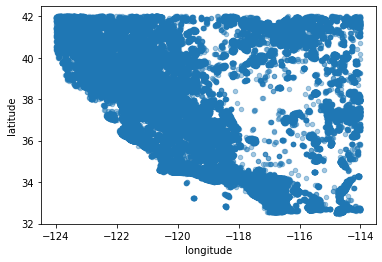

In [94]:
plt.figure(figsize=[20,10])
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

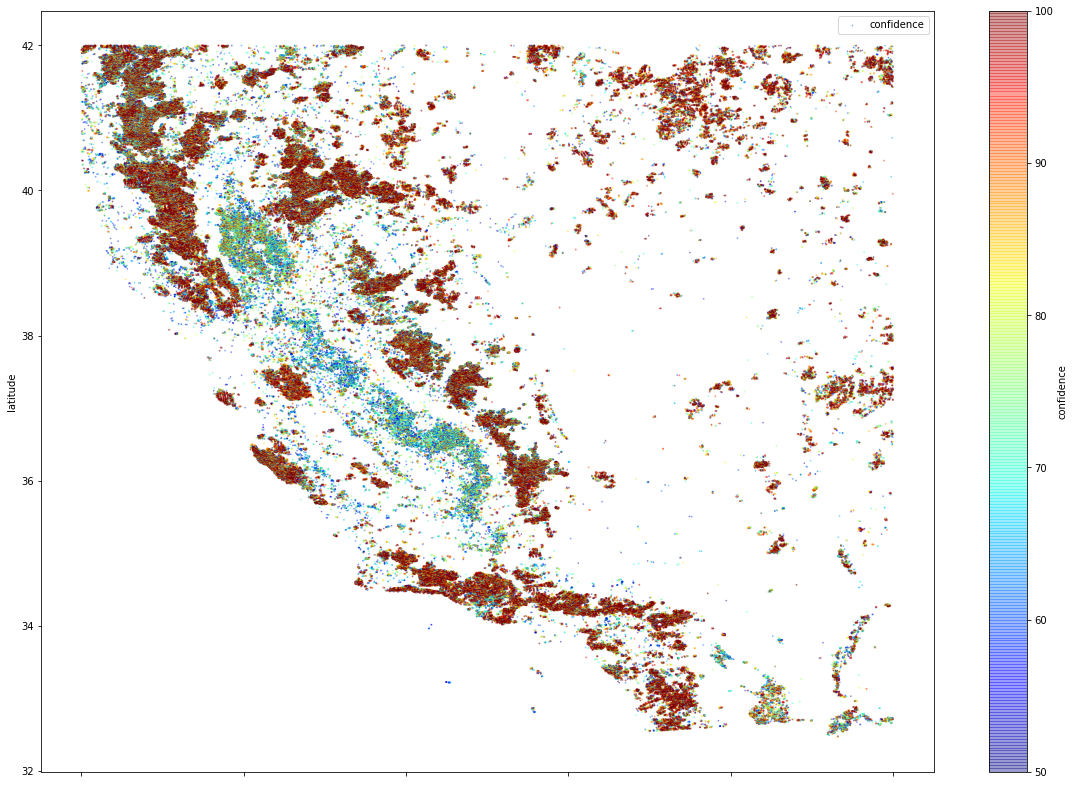

In [95]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['confidence']/100, label="confidence",
    c="confidence", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,14),
)
plt.legend()
plt.show()

Text(0, 0.5, 'Latitude')

Text(0.5, 0, 'Longitude')

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(1, 0.0, '50'),
 Text(1, 0.2, '60'),
 Text(1, 0.4, '70'),
 Text(1, 0.6000000000000001, '80'),
 Text(1, 0.8, '90'),
 Text(1, 1.0, '100')]

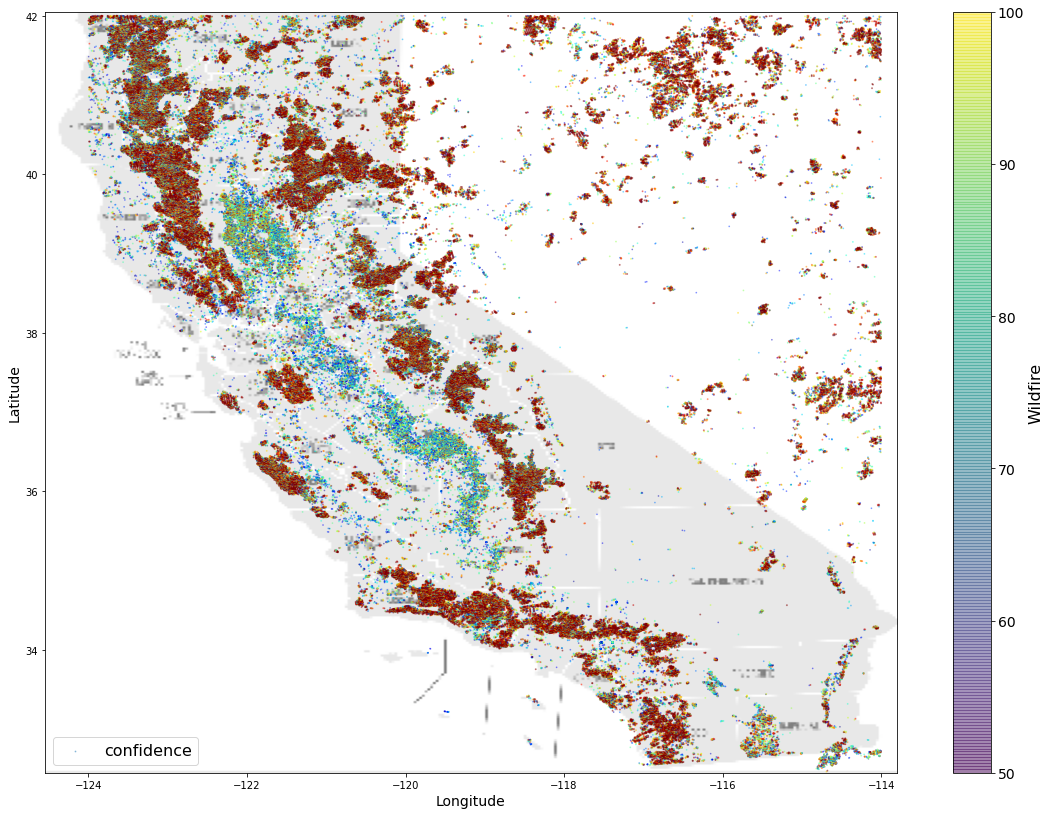

In [96]:
#Superimposing the cali map on our plot
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),
                       s=df['confidence']/100, label="confidence",
                       c="confidence", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

confidence = df["confidence"]
tick_values = np.linspace(confidence.min(), confidence.max(), 6)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["%d"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Wildfire', fontsize=16)

plt.legend(fontsize=16)
plt.show()